<h3>本週任務 ：
使用任意畫圖包畫出 星期幾 v.s 銷售量 的 bar chart。</h3>

<h4>用91app的資料畫出,星期幾的平均銷售量</h4>

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.style.use('ggplot')
%matplotlib inline

In [20]:
df = pd.read_csv('Ntu_Orders.csv')

In [21]:
df['new_DateId'] = pd.to_datetime(df['DateId'].astype(str), format='%Y%m%d')
data = df.groupby(by='new_DateId')['Quantity'].sum().to_frame()
#讓序號重新編排,確保不會有重複的情形
data.reset_index(level=0, inplace=True)
data.head(3)

,new_DateId,Quantity
0,2017-01-01,3823
1,2017-01-02,5105
2,2017-01-03,3623


*先將日期取出後,再把Quantity算整筆資料中星期幾的平均值

In [23]:
import datetime
data['week'] = data['new_DateId'].apply(lambda x: x.weekday())
data1= data.groupby(by='week')['Quantity'].mean().to_frame()

In [24]:
data1.reset_index(level=0, inplace=True)#讓序號重新編排,確保不會有重複的情形
data1

,week,Quantity
0,0,5853.759259
1,1,6707.981481
2,2,6604.396226
3,3,5833.264151
4,4,5534.433962
5,5,6261.679245
6,6,6524.407407


*將index name重新命名

In [25]:
data1.index.rename('week_name', inplace=True)
d = {0: 'Sun.', 1: 'Mon.', 2: 'Tues.',3: 'Wed.',4:'Thur.',5:'Fri.',6:'Sat.'}
#data1.index.replace(d)
data1.rename(index=d)

,week,Quantity
week_name,,
Sun.,0,5853.759259
Mon.,1,6707.981481
Tues.,2,6604.396226
Wed.,3,5833.264151
Thur.,4,5534.433962
Fri.,5,6261.679245
Sat.,6,6524.407407


*畫圖

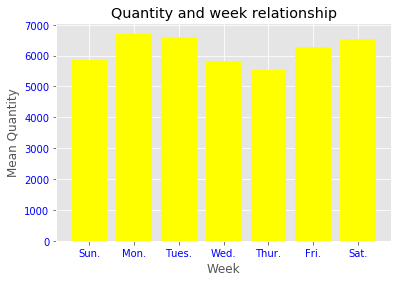

In [26]:
# Choose the height of the bars
Q = data1['Quantity']
 
# Choose the names of the bars
bars = ('Sun.','Mon.','Tues.','Wed.','Thur.','Fri.','Sat.')
y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, Q,color='yellow')
 
# Create names on the x-axis
plt.xticks(y_pos, bars, color='blue')
plt.yticks(color='blue')
plt.xlabel('Week')
plt.ylabel('Mean Quantity')
plt.title('Quantity and week relationship')
 
# Show graphic
plt.show()


發現：星期平均銷售量趨勢從星期五上升,而星期一,二,六銷售量較高